# Big basket Analysis

## Creating a class for all the basic functions on the dataset

In [836]:
import matplotlib.pyplot as plt
import pandas as pd

In [837]:
class big_basket:
    def __init__(self):
        ''' '''
        import pandas as pd
        self.data=pd.read_excel('bigbasketcasedataset1.xlsx','Sheet1') # Reading the sheet 1
        
    def get_unique(self):
        ''' To get unqiue details about the dataset '''
        print('[+] The dataset has -',self.data.shape[0],' data points')
        print('                    -',self.data['Member'].nunique(),' customer details')
        print('                    -',self.data['Description'].nunique(),' unique products')
        print('                    - data for ',(self.data['Date'].max()-self.data['Date'].min()).days,' days' )

In [838]:
bb=big_basket()

In [839]:
bb.get_unique()

[+] The dataset has - 61208  data points
                    - 106  customer details
                    - 215  unique products
                    - data for  1367  days


# Exploratory Data Analysis


## 1.  Popularity based recommender system - 
An approach that can be used when we do not have user data available / for new users

In [840]:
bb.data['Description'].value_counts()[0:15]

Other Vegetables     4537
Beans                4503
Root Vegetables      4247
Other Dals           3212
Organic F&V          3089
Gourd & Cucumber     2939
Whole Spices         2933
Brinjals             2539
Namkeen              2206
Banana               2157
Exotic Vegetables    1385
Moong Dal            1353
Sugar                1324
Toor Dal             1285
Sooji & Rava         1259
Name: Description, dtype: int64

#### The above are the product with maximum sales. Hence these can be recommended for new users, when we do not have any specific user details

### Adding some new columns for ease of working with dates

In [841]:
bb.data['Month']=bb.data['Date'].apply(lambda x: x.month )
bb.data['Day']=bb.data['Date'].apply(lambda x: x.day )
bb.data['Year']=bb.data['Date'].apply(lambda x: x.year )

In [842]:
bb.data.head()

,Unnamed: 0,Member,Order,SKU,Date,Description,lastdate,Month,Day,Year
0,0,M09736,6468572,34993740,2014-09-22,Other Sauces,NaN,9,22,2014
1,1,M09736,6468572,15669800,2014-09-22,Cashews,NaN,9,22,2014
2,2,M09736,6468572,34989501,2014-09-22,Other Dals,NaN,9,22,2014
3,3,M09736,6468572,7572303,2014-09-22,Namkeen,NaN,9,22,2014
4,4,M09736,6468572,15669856,2014-09-22,Sugar,NaN,9,22,2014


### Checking for missing values or discrepancies

In [20]:
bb.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61208 entries, 0 to 61207
Data columns (total 10 columns):
Unnamed: 0     61208 non-null int64
Member         61208 non-null object
Order          61208 non-null int64
SKU            61208 non-null int64
Date           61208 non-null datetime64[ns]
Description    61208 non-null object
lastdate       0 non-null float64
Month          61208 non-null int64
Day            61208 non-null int64
Year           61208 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 4.7+ MB


Seems like there are no NAN values

In [21]:
bb.data['Member'].unique()

array(['M09736', 'M39021', 'M47229', 'M76390', 'M77779', 'M78365',
       'M78720', 'M82651', 'M84827', 'M86304', 'M86572', 'M90375',
       'M91098', 'M96365', 'M99030', 'M99206', 'M04158', 'M08075',
       'M09303', 'M12050', 'M12127', 'M14746', 'M16218', 'M16611',
       'M18732', 'M22037', 'M25900', 'M27458', 'M27871', 'M31101',
       'M31908', 'M31966', 'M32039', 'M32409', 'M32449', 'M32480',
       'M32655', 'M33064', 'M33422', 'M33491', 'M33558', 'M33745',
       'M33767', 'M34566', 'M35070', 'M35464', 'M35538', 'M35649',
       'M36366', 'M36432', 'M36702', 'M36876', 'M37253', 'M37600',
       'M38622', 'M40184', 'M41700', 'M41747', 'M41781', 'M42182',
       'M42513', 'M42827', 'M43189', 'M43831', 'M43977', 'M44156',
       'M45375', 'M45470', 'M46325', 'M46328', 'M46575', 'M46687',
       'M48101', 'M48154', 'M48938', 'M50038', 'M50094', 'M50420',
       'M50767', 'M51043', 'M51278', 'M52629', 'M54100', 'M54345',
       'M54382', 'M54619', 'M54796', 'M55932', 'M56255', 'M563

In [22]:
bb.data['Order'].nunique()

8275

#### The dataset does not seem to have any data discrepancies

### Understanding the purchase patterns over time

Text(0.5, 1.0, 'Customer Purchase patterns over the years')

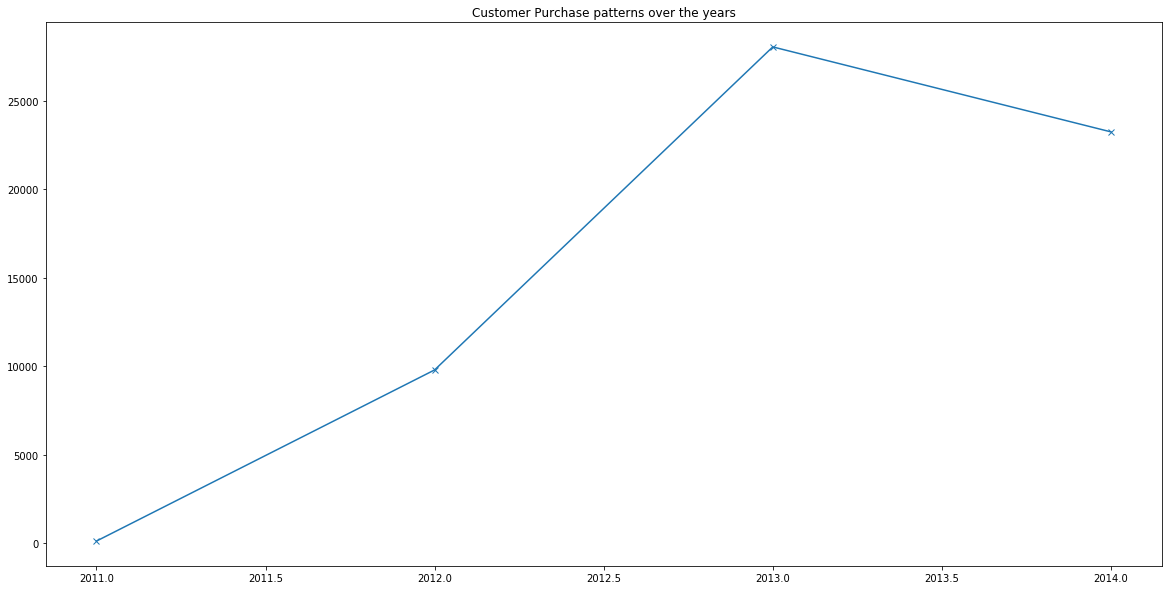

In [23]:
plt.figure(figsize=(20,10))
plt.plot(bb.data.groupby(by='Year').count()['Order'].index,bb.data.groupby(by='Year').count()['Order'].values,marker='x')
plt.title('Customer Purchase patterns over the years')

### It seems that the orders have dropped in 2014. 
Trying to understand the reason for drop in 2014

In [26]:

bb.data['Date'].max()

# We have data till 8th December, which is almost the whole year. 

Timestamp('2014-12-08 00:00:00')

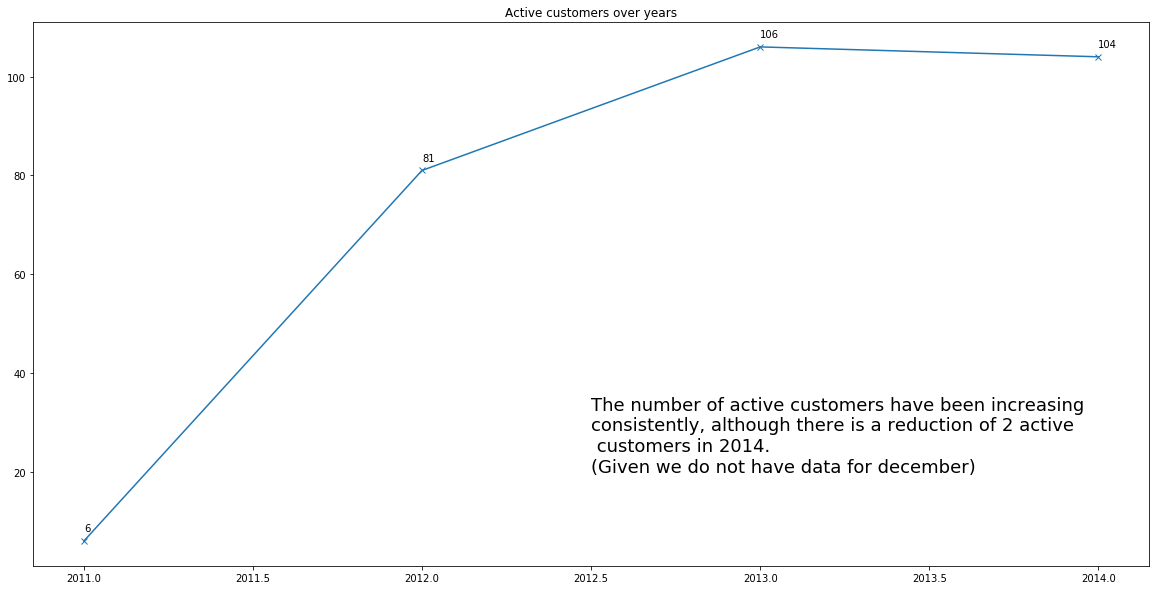

In [27]:
# Checking the number of customers over years
plt.figure(figsize=(20,10))
customers_over_years=[bb.data[bb.data['Year']==year]['Member'].nunique()   for year in bb.data['Year'].unique()]
plt.plot(bb.data['Year'].unique(),customers_over_years,marker='x')
plt.title('Active customers over years')
for year,value in zip(bb.data['Year'].unique(),customers_over_years):
    plt.text(year,value+2,str(value))
plt.text(2012.5, 20, 'The number of active customers have been increasing \nconsistently, although there is a reduction of 2 active\n customers in 2014. \n(Given we do not have data for december)', fontsize = 18)
plt.show()

### Hence reduction of active users is not the problem

In [28]:
bb.data[bb.data['Year']==2013].groupby(by='Month').count()['Member'].values

array([2428, 1807, 2026, 1944, 2458, 2385, 2693, 2620, 2499, 2503, 2345,
       2343])

In [29]:
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

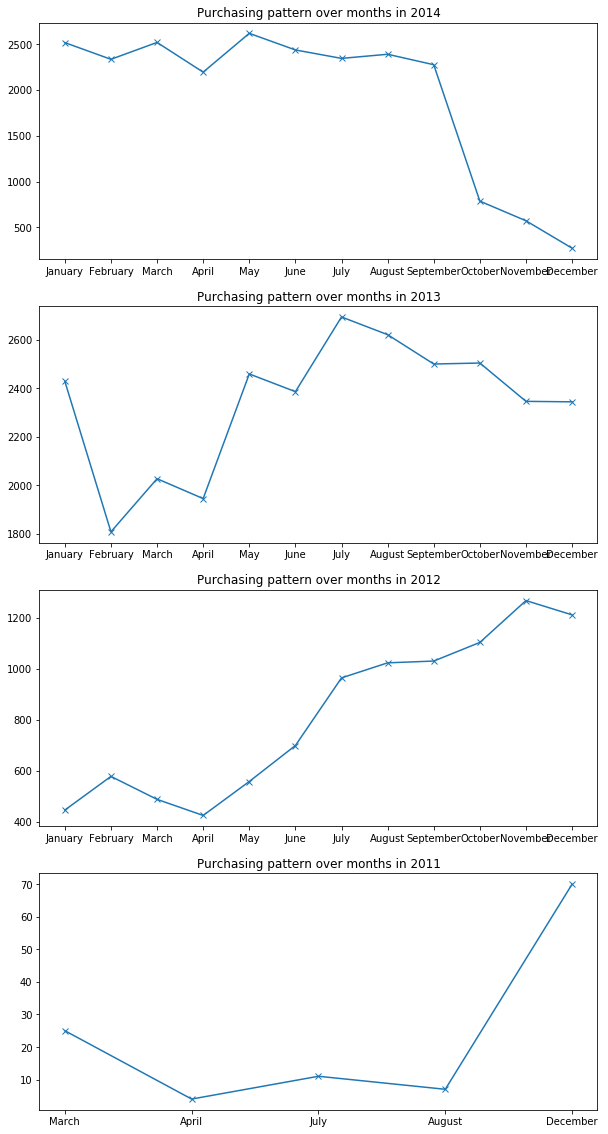

In [30]:
# Understanding the change in purchase habbits over the months
plt.figure(figsize=(10,20))
i=1
for year in bb.data['Year'].unique():
    plt.subplot(4,1,i)
    data=bb.data[bb.data['Year']==year].groupby(by='Month').count()['Member']
    plt.plot([months[i] for i in data.index],data.values,marker='x')
    plt.title('Purchasing pattern over months in '+str(year))
    i+=1

#### It can be seen that there is considerable increase in customer purchases till 2014 May, and the purchases has been dropping since then

## Customer Purchasing patterns over time

### Variation of Customer Purcharse habbits

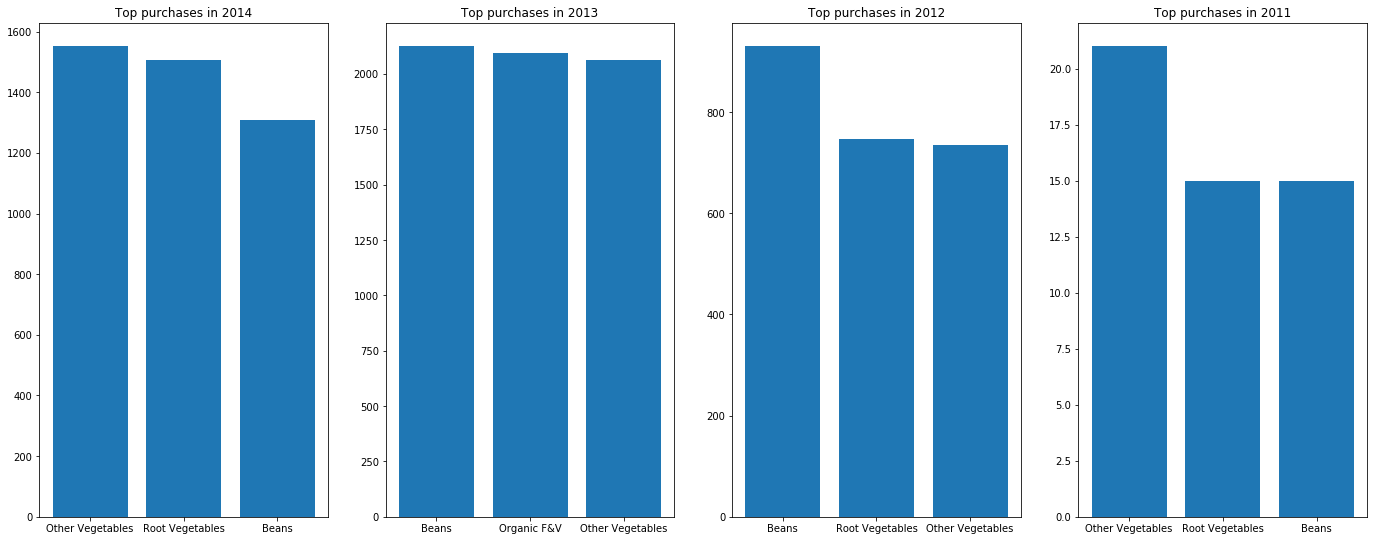

In [8]:
plt.figure(figsize=(30,20))
i=1
for year in bb.data['Year'].unique():
    x_axis=[bb.data[bb.data['Year']==year]['Description'].value_counts()[0:3].index]
    y_axis=[bb.data[bb.data['Year']==year]['Description'].value_counts()[0:3].values]
    plt.subplot(2,5,i)
    plt.bar(x_axis[0],y_axis[0])
    plt.title('Top purchases in '+str(year))
    i+=1

### It seems that Beans, Root Vegatables, and Organic Vegatables are the most purchsed product over the years

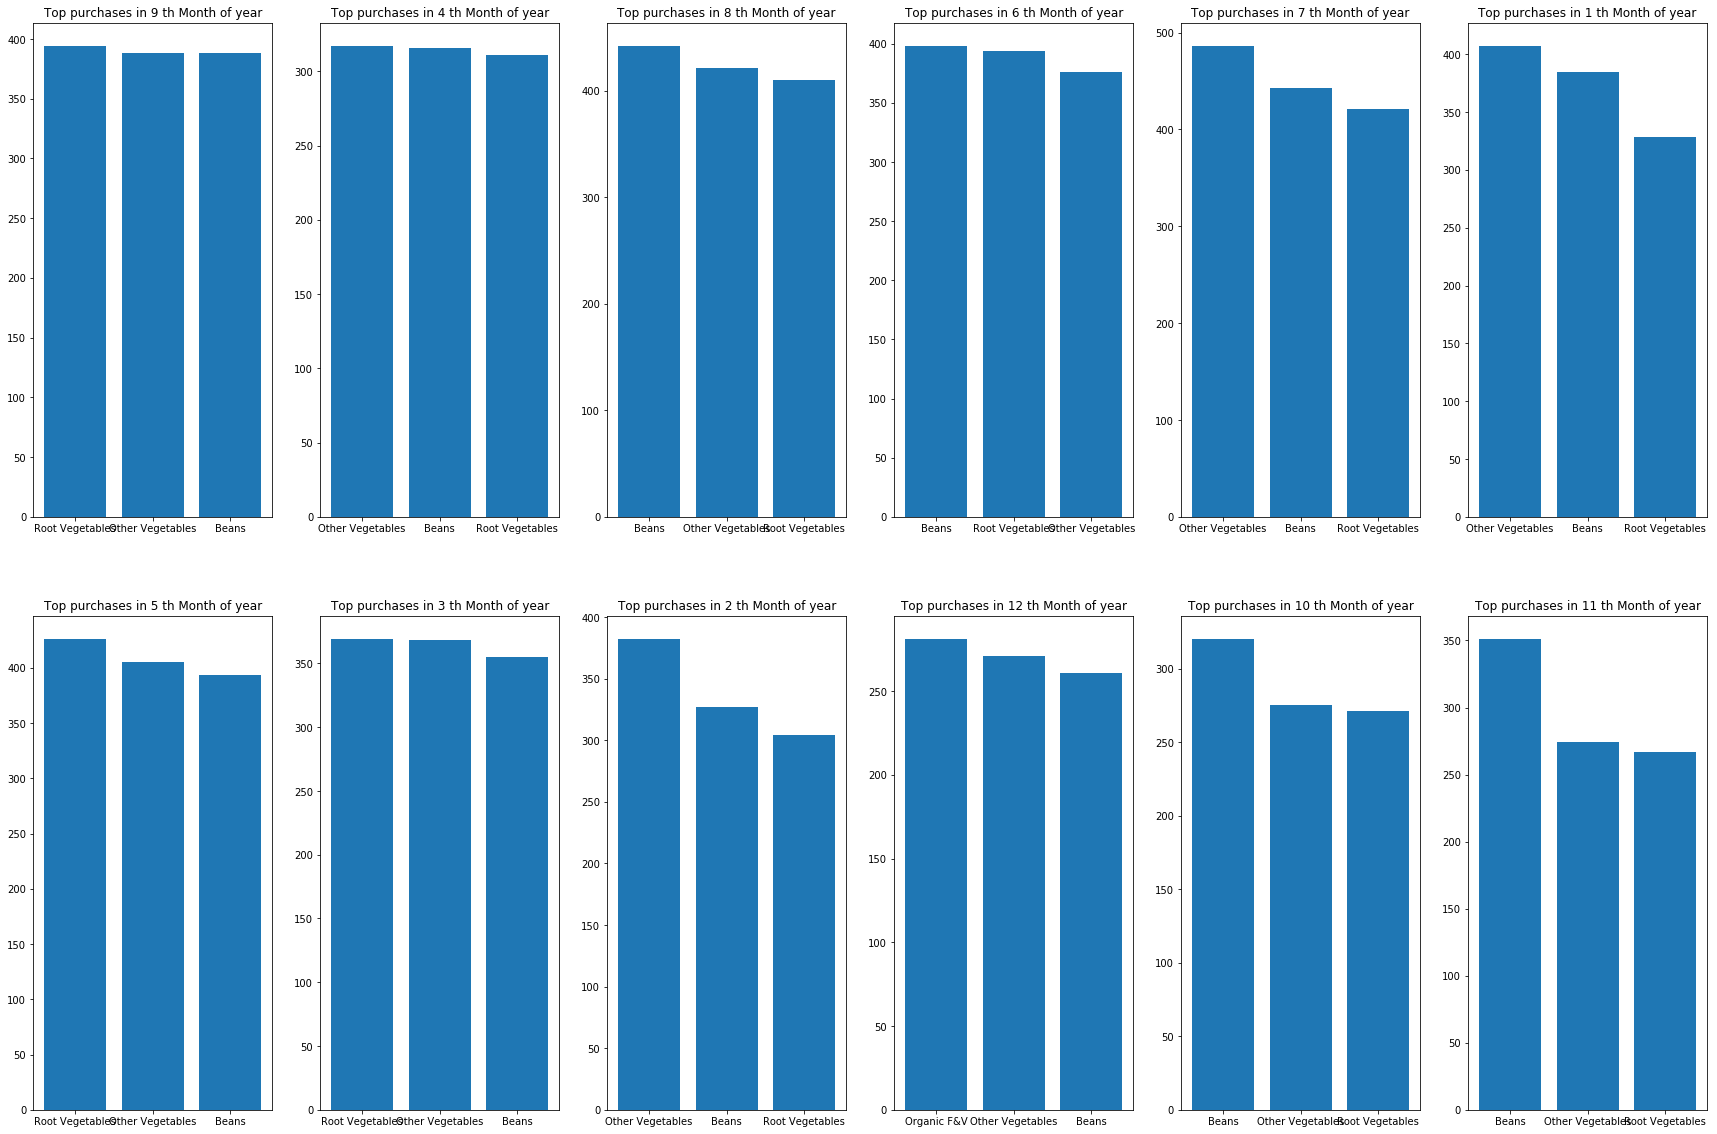

In [9]:
plt.figure(figsize=(30,20))
i=1
for month in bb.data['Month'].unique():
    x_axis=[bb.data[bb.data['Month']==month]['Description'].value_counts()[0:3].index]
    y_axis=[bb.data[bb.data['Month']==month]['Description'].value_counts()[0:3].values]
    plt.subplot(2,6,i)
    plt.bar(x_axis[0],y_axis[0])
    plt.title('Top purchases in '+str(month)+' th Month of year')
    i+=1

### Based on the most purchased products and the changing trends over the years and months, it seems that Beans, Other vegatables and Root vegetables are something which can be recommended to new users

### Understanding the purchase differences over time for the top 5 most purchased products

In [152]:
# Finding the 3 items which are top 3 in each month

top_few=[]
top_few_values=[[] for i in range(11)]
for year in np.sort(bb.data['Year'].unique()):
    for month in np.sort(bb.data[bb.data['Year']==year]['Month'].unique()):
        top=bb.data[(bb.data['Year']==year)&(bb.data['Month']==month)]['Description'].value_counts().index[0:3]
        top_values=bb.data[(bb.data['Year']==year)&(bb.data['Month']==month)]['Description'].value_counts().values[0:3]
        for item in top:
            if item not in top_few:
                top_few.append(item)
                

top_few_values=[[] for i in range(11)]
for year in np.sort(bb.data['Year'].unique()):
    for month in np.sort(bb.data[bb.data['Year']==year]['Month'].unique()):
        top=bb.data[(bb.data['Year']==year)&(bb.data['Month']==month)]['Description'].value_counts().index
        top_values=bb.data[(bb.data['Year']==year)&(bb.data['Month']==month)]['Description'].value_counts().values
        idx_list=[]
        for item in top_few:
            idx=top_few.index(item)
            try:
                top_few_values[idx].append(top_values[list(top).index(item)])
                idx_list.append(idx)
            except:
                pass
        for i in range(11):
            if i not in idx_list:
                top_few_values[i].append(0)

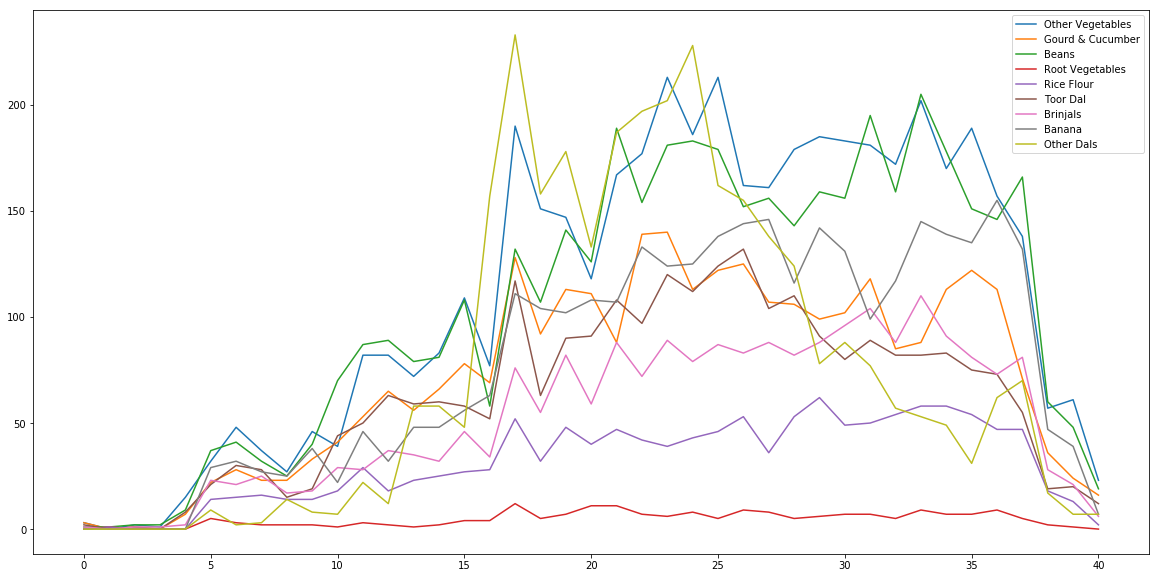

In [157]:
# Creating top_few plots
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(top_few_values[0])),top_few_values[0])
plt.plot(np.arange(len(top_few_values[0])),top_few_values[1])
plt.plot(np.arange(len(top_few_values[0])),top_few_values[3])
plt.plot(np.arange(len(top_few_values[0])),top_few_values[4])
plt.plot(np.arange(len(top_few_values[0])),top_few_values[5])
plt.plot(np.arange(len(top_few_values[0])),top_few_values[6])
plt.plot(np.arange(len(top_few_values[0])),top_few_values[7])
plt.plot(np.arange(len(top_few_values[0])),top_few_values[8])
plt.plot(np.arange(len(top_few_values[0])),top_few_values[9])
plt.legend(top_few)

### It can be seen that the orders have reduced considerably from May 2014. It was also observed that the total number of customers placing order has not decreased. But the quantity of orders placed seems to be decreasing. 
### It could be beacause of reduced inentory or some other reason unknown. Need to validate hypothesis

# Creating clusters for different user groups

In [158]:
top1=[]
top2=[]
top3=[]
top4=[]
members=[]
for member in bb.data['Member'].unique():
    members.append(member)
    top1.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[0])
    top2.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[1])
    top3.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[2])
    top4.append(bb.data[bb.data['Member']==member]['Description'].value_counts()[0:4].index[3])


In [159]:
t1=[]
t2=[]
t3=[]
t4=[]
for i,row in bb.data.iterrows():
    index = members.index(row['Member'])
    t1.append(top1[index])
    t2.append(top2[index])
    t3.append(top3[index])
    t4.append(top4[index])

In [160]:
bb.data['Top1']=t1
bb.data['Top2']=t2
bb.data['Top3']=t3
bb.data['Top4']=t4


#### Label Encoding the data

In [161]:
products=list(bb.data['Top1'])+list(bb.data['Top2'])+list(bb.data['Top3'])+list(bb.data['Top4'])
products=list(set(products))
product_dictionary={}
product_dictionary={ products[i]: i for i in range(len(products))}

In [162]:
cluster_data=bb.data[['Top1', 'Top2', 'Top3', 'Top4']]
for column in cluster_data.columns:
    cluster_data[column]=cluster_data[column].apply(lambda x: product_dictionary[x])

/home/blink/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Creating clusters with Kmeans

/home/blink/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
100%|██████████| 38/38 [00:40<00:00,  1.61s/it]


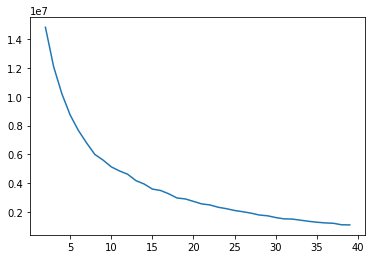

In [163]:
import numpy as np
from sklearn.cluster  import KMeans
from tqdm import tqdm
scores=[]
for i in tqdm(range(2,40)):
    km=KMeans(n_clusters=i)
    km.fit(cluster_data)
    scores.append(km.inertia_)

plt.plot(np.arange(2,40),scores)

In [164]:
km=KMeans(n_clusters=5)
km.fit(cluster_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [165]:
classes=km.predict(cluster_data)

In [166]:
bb.data['Cluster']=classes

In [167]:
bb.data[bb.data['Cluster']==1].head()

,Unnamed: 0,Member,Order,SKU,Date,Description,lastdate,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
1037,1063,M47229,6728685,15668455,2014-11-07,Brinjals,NaN,11,7,2014,Beans,Root Vegetables,Other Vegetables,Diapers & Wipes,1
1038,1064,M47229,6728685,15668381,2014-11-07,Other Vegetables,NaN,11,7,2014,Beans,Root Vegetables,Other Vegetables,Diapers & Wipes,1
1039,1065,M47229,6728685,15668453,2014-11-07,Brinjals,NaN,11,7,2014,Beans,Root Vegetables,Other Vegetables,Diapers & Wipes,1
1040,1066,M47229,6728685,7729965,2014-11-07,Sunflower Oils,NaN,11,7,2014,Beans,Root Vegetables,Other Vegetables,Diapers & Wipes,1
1041,1067,M47229,6728685,7621580,2014-11-07,Diapers & Wipes,NaN,11,7,2014,Beans,Root Vegetables,Other Vegetables,Diapers & Wipes,1


In [168]:
bb.data[bb.data['Cluster']==0].head()

,Unnamed: 0,Member,Order,SKU,Date,Description,lastdate,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
0,0,M09736,6468572,34993740,2014-09-22,Other Sauces,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0
1,1,M09736,6468572,15669800,2014-09-22,Cashews,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0
2,2,M09736,6468572,34989501,2014-09-22,Other Dals,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0
3,3,M09736,6468572,7572303,2014-09-22,Namkeen,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0
4,4,M09736,6468572,15669856,2014-09-22,Sugar,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0


In [169]:
bb.data[bb.data['Cluster']==2].head()

,Unnamed: 0,Member,Order,SKU,Date,Description,lastdate,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
610,626,M39021,6422636,7580802,2014-09-28,Sunflower Oils,NaN,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,2
611,627,M39021,6422636,15668453,2014-09-28,Brinjals,NaN,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,2
612,628,M39021,6422636,15668375,2014-09-28,Root Vegetables,NaN,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,2
613,629,M39021,6422636,15668379,2014-09-28,Other Vegetables,NaN,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,2
614,630,M39021,6422636,15669760,2014-09-28,Whole Spices,NaN,9,28,2014,Beans,Root Vegetables,Sunflower Oils,Other Vegetables,2


In [170]:
bb.data[bb.data['Cluster']==3].head()

,Unnamed: 0,Member,Order,SKU,Date,Description,lastdate,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
1423,1465,M76390,6430330,15668375,2014-09-30,Root Vegetables,NaN,9,30,2014,Namkeen,Organic F&V,Beans,Other Vegetables,3
1424,1466,M76390,6430330,34987569,2014-09-30,Powdered Spices,NaN,9,30,2014,Namkeen,Organic F&V,Beans,Other Vegetables,3
1425,1467,M76390,6447929,7580802,2014-06-10,Sunflower Oils,NaN,6,10,2014,Namkeen,Organic F&V,Beans,Other Vegetables,3
1426,1468,M76390,6447929,15669787,2014-06-10,Raw Rice,NaN,6,10,2014,Namkeen,Organic F&V,Beans,Other Vegetables,3
1427,1469,M76390,6447929,15669860,2014-06-10,Moong Dal,NaN,6,10,2014,Namkeen,Organic F&V,Beans,Other Vegetables,3


In [171]:
bb.data[bb.data['Cluster']==4].head()

,Unnamed: 0,Member,Order,SKU,Date,Description,lastdate,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
16222,16483,M32039,7350873,93073679,2013-10-18,Namkeen,NaN,10,18,2013,Other Vegetables,Other Dals,Gourd & Cucumber,Beans,4
16223,16484,M32039,7350873,7569802,2013-10-18,Namkeen,NaN,10,18,2013,Other Vegetables,Other Dals,Gourd & Cucumber,Beans,4
16224,16485,M32039,7350873,15668378,2013-10-18,Other Vegetables,NaN,10,18,2013,Other Vegetables,Other Dals,Gourd & Cucumber,Beans,4
16225,16486,M32039,7350873,21408947,2013-10-18,Other Rice Products,NaN,10,18,2013,Other Vegetables,Other Dals,Gourd & Cucumber,Beans,4
16226,16487,M32039,7350873,15668460,2013-10-18,Gourd & Cucumber,NaN,10,18,2013,Other Vegetables,Other Dals,Gourd & Cucumber,Beans,4


### Now we can segment the customers into these clusters and give them recommendation based on the shopping patterns. 
### This will also help in classifying a new customer quickly based on their shopping patterns
### The problem with this approach is, if a new product is added, the model will have to be trained again. 

In [ ]:
bb.data.to_csv('pre_preocessed_data.csv',index=False)

# Predictions of next purchase dates and order items
For prediction of next purchase date we are using an observation window of 3 days , to see the last three purchases. Based on the last 3, we are predicting the next purchase date<br>
For predcting the top 10 SKU's we are using User-User collaborative filtering. We are identifying similar users and we are using their purchasing patterns to predict the SKU

# Loading the saved dataset

In [844]:
import pandas as pd
bb=pd.read_csv('pre_preocessed_data.csv')
bb.drop(bb.columns[0:2],axis=1,inplace=True)
from datetime import datetime
bb['Date']=bb['Date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))
bb.head()

,Member,Order,SKU,Date,Description,lastdate,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster
0,M09736,6468572,34993740,2014-09-22,Other Sauces,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0
1,M09736,6468572,15669800,2014-09-22,Cashews,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0
2,M09736,6468572,34989501,2014-09-22,Other Dals,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0
3,M09736,6468572,7572303,2014-09-22,Namkeen,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0
4,M09736,6468572,15669856,2014-09-22,Sugar,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0


#### Coverting date into a number


In [845]:
def datestdtojd (stddate):
    fmt='%Y-%m-%d'
    sdtdate = datetime.strptime(stddate, fmt)
    year=str(sdtdate.year)
    sdtdate = sdtdate.timetuple()
    jdate = sdtdate.tm_yday
    return(int(year+str(jdate)))

In [846]:
bb['current_julian_date']=bb['Date'].apply(lambda x: x.to_julian_date())

In [847]:
bb.head()

,Member,Order,SKU,Date,Description,lastdate,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster,current_julian_date
0,M09736,6468572,34993740,2014-09-22,Other Sauces,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0,2456922.5
1,M09736,6468572,15669800,2014-09-22,Cashews,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0,2456922.5
2,M09736,6468572,34989501,2014-09-22,Other Dals,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0,2456922.5
3,M09736,6468572,7572303,2014-09-22,Namkeen,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0,2456922.5
4,M09736,6468572,15669856,2014-09-22,Sugar,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0,2456922.5


# Understanding some customers purchase patterns

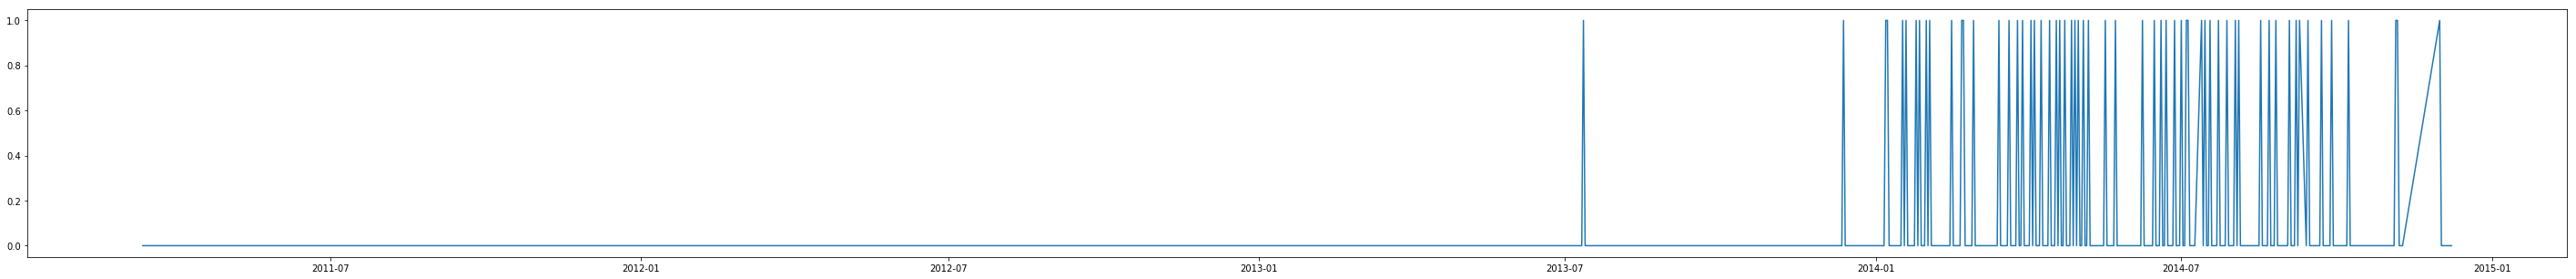

In [562]:
purchase_dates=bb[bb['Member']==bb['Member'].unique()[0]]['Date'].unique()
status=[]
for date in np.sort(bb['Date'].unique()):
    if date in purchase_dates:
        status.append(1)
    else:
        status.append(0)
plt.figure(figsize=(50,5))
plt.xlim()
plt.plot(np.sort(bb['Date'].unique()),status)

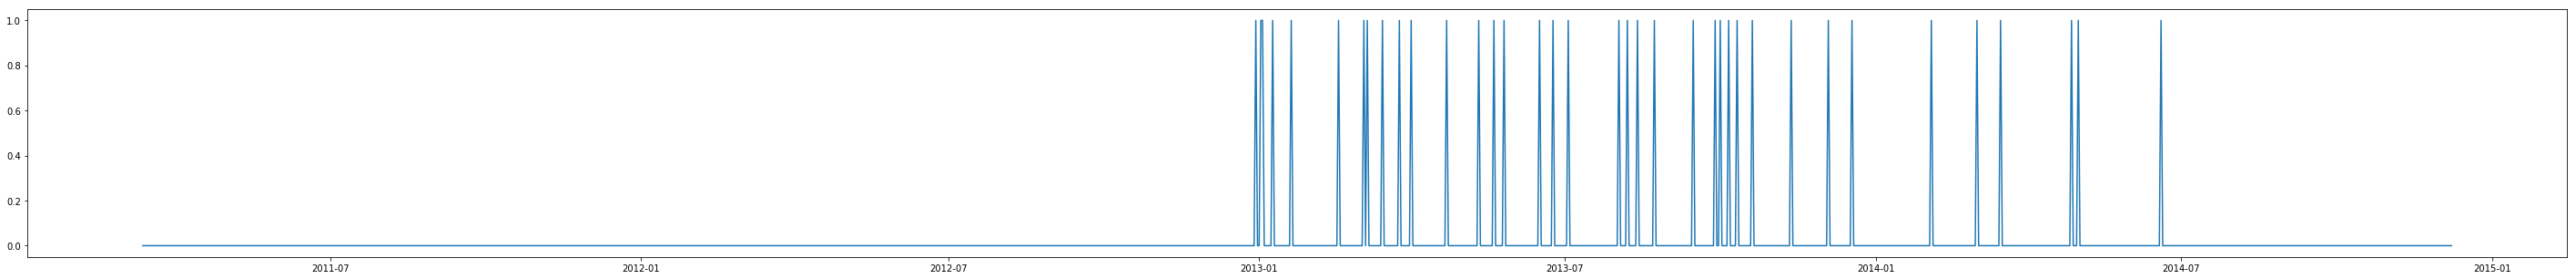

In [563]:
purchase_dates=bb[bb['Member']==bb['Member'].unique()[20]]['Date'].unique()
status=[]
for date in np.sort(bb['Date'].unique()):
    if date in purchase_dates:
        status.append(1)
    else:
        status.append(0)
plt.figure(figsize=(50,5))
plt.xlim()
plt.plot(np.sort(bb['Date'].unique()),status)

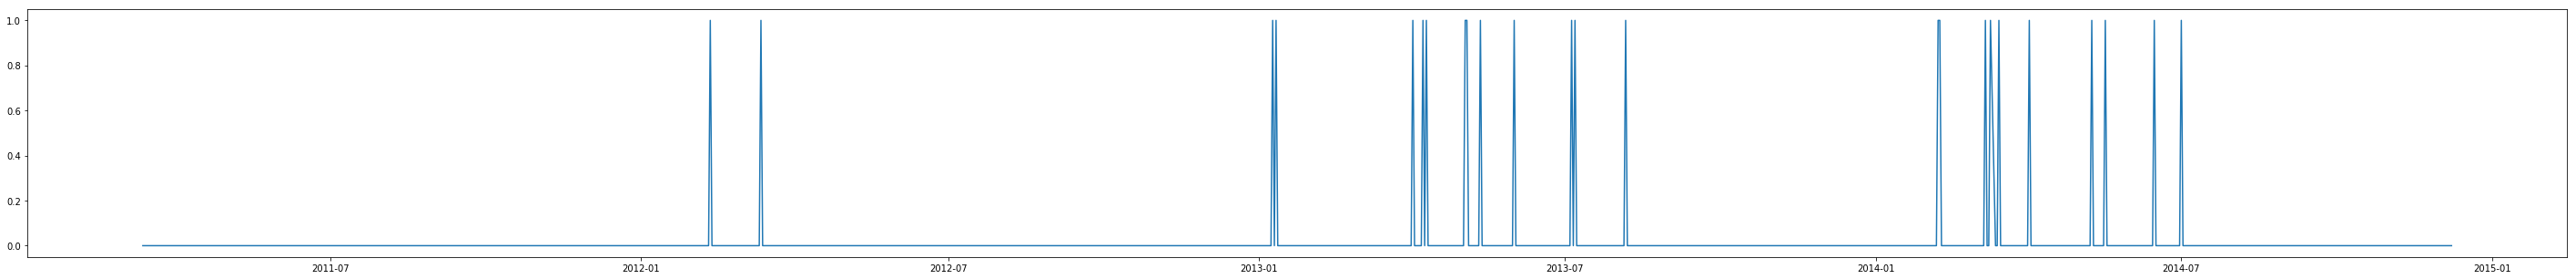

In [564]:
purchase_dates=bb[bb['Member']==bb['Member'].unique()[100]]['Date'].unique()
status=[]
for date in np.sort(bb['Date'].unique()):
    if date in purchase_dates:
        status.append(1)
    else:
        status.append(0)
plt.figure(figsize=(50,5))
plt.xlim()
plt.plot(np.sort(bb['Date'].unique()),status)

In [565]:
pd.DataFrame(bb.groupby(by='Order').count().sort_values(by='Member',ascending=False)['Member']).head()

,Member
Order,
6738016,42
6438096,41
7696664,38
6506666,37
7597091,36


In [566]:
pd.DataFrame(bb.groupby(by='Order').count().sort_values(by='Member',ascending=False)['Member']).tail()

,Member
Order,
7931542,1
8272504,1
7707525,1
8131347,1
7927146,1


#### Based on analysis it seems that there are different types of customers
<ul>
    <li> Customers who are consistent</li>
    <li> Customers who are rarely use the app less frequently</li>
    <li> Customers who have stopped using the service </li>
    <li> Customers who have used the service only once or twice </li>
<ul><br><br>
<body> 
    We shall try to predict the next customer purchase date based on the previous 4 purchase dates. For that purpose, we will have to drop the data of all the customers who have data less than 4 . That is 
    <ul>
        <li> Observation window : last 4 purchases ( It can extend over a few days or months )</li>
</body>

## Preparing the data for date prediction using a linear regression model

In [567]:
df=pd.DataFrame(bb.groupby(by='Order').count().sort_values(by='Member',ascending=False)['Member'])
selected_customers=df[df['Member']>4].index

In [568]:
dataset=bb[bb['Order'].isin(selected_customers)]
dataset=dataset[['Member','Order','Description','Cluster','current_julian_date']]
dataset.head()

,Member,Order,Description,Cluster,current_julian_date
0,M09736,6468572,Other Sauces,0,2456922.5
1,M09736,6468572,Cashews,0,2456922.5
2,M09736,6468572,Other Dals,0,2456922.5
3,M09736,6468572,Namkeen,0,2456922.5
4,M09736,6468572,Sugar,0,2456922.5


In [569]:
dataset.reset_index(inplace=True)
dataset.drop(dataset.columns[0],axis=1,inplace=True)

#### Combining the entries which belong to the same order

In [570]:
# Getting indexes of same orders
order_indexes={}
current_date=[]
member=[]
for order in tqdm(dataset['Order'].unique()):
    order_indexes[order]=dataset[dataset['Order']==order].index.values
    current_date.append(dataset[dataset['Order']==order]['current_julian_date'].unique()[0])
    member.append(dataset[dataset['Order']==order]['Member'].unique()[0])
orders=order_indexes.keys()
dataset.drop(['Order'],axis=1,inplace=True)

100%|██████████| 5739/5739 [00:16<00:00, 339.08it/s]


In [571]:
common_orders=list(order_indexes.values())
products=[]
for indexes in tqdm(common_orders):
    try:
        products.append(list(dataset.iloc[indexes]['Description'].unique()))
    except:
        print('Error')

100%|██████████| 5739/5739 [00:04<00:00, 1304.94it/s]


In [572]:
training_data=pd.DataFrame()
training_data['Order']=orders
training_data['Member']=member
training_data['products']=products
training_data['current_date']=current_date

In [573]:
p1_master=[]
p2_master=[]
p3_master=[]
master_dataset=pd.DataFrame()
for user in tqdm(training_data['Member'].unique()):
    df=pd.DataFrame(training_data[training_data['Member']==user].sort_values(by='current_date',ascending=False))
    df.reset_index(inplace=True)
    df.drop(df.columns[0],axis=1,inplace=True)
    p1=[]
    p2=[]
    p3=[]
    for i,row in df.iterrows():
        try:
            p1.append(df.loc[i+1]['current_date'])
            p2.append(df.loc[i+2]['current_date'])
            p3.append(df.loc[i+3]['current_date'])
        except:
            p1.append(0)
            p2.append(0)
            p3.append(0)
    p1=p1[:-2]
    p2=p2[:-1]
    df['p1']=p1
    df['p2']=p2
    df['p3']=p3
    
    master_dataset=pd.concat([master_dataset,df],ignore_index=True)

100%|██████████| 106/106 [00:05<00:00, 21.56it/s]


master_dataset.to_csv('train.csv') # saving the intermediate result for faster re-execution

In [621]:
master_dataset=pd.read_csv('train.csv')

In [622]:
master_dataset.drop(list(master_dataset[master_dataset['p1']==0].index),axis=0,inplace=True)

In [623]:
master_dataset.drop(['Order','Member','products'],axis=1,inplace=True)
y=master_dataset['current_date']
x=master_dataset.drop(['current_date'],axis=1)

In [624]:
x.drop(x.columns[0],axis=1,inplace=True)

In [722]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [726]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9950350111188072

In [727]:
y_pred=lr.predict(x)

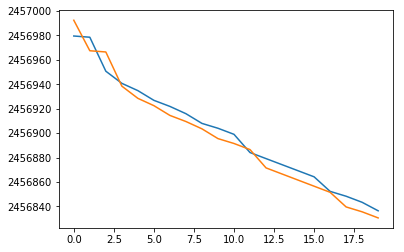

In [728]:
plt.plot(y_pred[0:20])
plt.plot(y[0:20])

### Predicting the next purchase date

In [641]:
julian.from_jd(lr.predict([x.iloc[0]]))

datetime.datetime(2014, 11, 18, 3, 41, 17, 49489)

### RMS of the model

In [659]:
from sklearn.metrics import mean_squared_error
import math

mse=mean_squared_error(y_pred,y)
print('RMS : ',math.sqrt(mse))

RMS :  16.57876259986778


### Predicting the next order date for each customer


In [666]:
training_data.head()

,Order,Member,products,current_date
0,6468572,M09736,"[Other Sauces, Cashews, Other Dals, Namkeen, S...",2456922.5
1,6486475,M09736,"[Utensil Scrub Pads, Other Rice Products, Toor...",2456928.5
2,6504964,M09736,"[Urad Dal, Boiled Rice, Jaggery, Other Dals, R...",2456914.5
3,6529569,M09736,"[Sugar, Jaggery, Root Vegetables, Cakes, Urad ...",2456756.5
4,6549521,M09736,"[Banana, Cashews, Other Rice Products, Raw Pea...",2456909.5


In [674]:
p1_master=[]
p2_master=[]
p3_master=[]

prediction_data=pd.DataFrame()
for user in tqdm(training_data['Member'].unique()):
    member=[]
    df=pd.DataFrame(training_data[training_data['Member']==user].sort_values(by='current_date',ascending=False))
    df.reset_index(inplace=True)
    df.drop(df.columns[0],axis=1,inplace=True)
    p1=[]
    p2=[]
    p3=[]
    for i,row in df.iterrows():
        member.append(user)
        try:
            p1.append(df.loc[i+1]['current_date'])
            p2.append(df.loc[i+2]['current_date'])
            p3.append(df.loc[i+3]['current_date'])
        except:
            p1.append(0)
            p2.append(0)
            p3.append(0)
    p1=p1[:-2]
    p2=p2[:-1]
    df['p1']=p1
    df['p2']=p2
    df['p3']=p3
    df['Member']=member
    prediction_data=pd.concat([prediction_data,df],ignore_index=True)

100%|██████████| 106/106 [00:05<00:00, 20.79it/s]


In [700]:
members=[]
next_date=[]
for member in tqdm(training_data['Member'].unique()):
    # Making prediction based on the last order placed
    p1=prediction_data[prediction_data['Member']==member]['current_date'].max()
    p2=prediction_data[prediction_data['Member']==member]['p1'].max()
    p3=prediction_data[prediction_data['Member']==member]['p2'].max()
    members.append(member)
    next_date.append(julian.from_jd(lr.predict([[p1,p2,p3]])).date())
prediction=pd.DataFrame()
prediction['Member']=members
prediction['Predicted Next Order']=next_date

100%|██████████| 106/106 [00:00<00:00, 182.58it/s]


In [702]:
prediction.head()

,Member,Predicted Next Order
0,M09736,2014-12-13
1,M39021,2014-10-13
2,M47229,2014-11-19
3,M76390,2014-12-15
4,M77779,2014-09-30


In [704]:
prediction.to_csv('next_order_prediction.csv')

### The Linear Regression model was able to make predictions with a Root mean Squared Error of 16. 
By using a linear regression model, we have ensured that the model is well explainable, and we have used feature engineering to do the predictions 

# Understanding the SKU Column for SKU prediction

In [765]:
bb[bb['SKU']==bb['SKU'].unique()[1]]

,Member,Order,SKU,Date,Description,lastdate,Month,Day,Year,Top1,Top2,Top3,Top4,Cluster,current_julian_date
1,M09736,6468572,15669800,2014-09-22,Cashews,NaN,9,22,2014,Banana,Beans,Other Dals,Root Vegetables,0,2456922.5
40,M09736,6529569,15669800,2014-04-09,Cashews,NaN,4,9,2014,Banana,Beans,Other Dals,Root Vegetables,0,2456756.5
44,M09736,6549521,15669800,2014-09-09,Cashews,NaN,9,9,2014,Banana,Beans,Other Dals,Root Vegetables,0,2456909.5
2999,M78720,7425894,15669800,2013-09-14,Cashews,NaN,9,14,2013,Chips,Banana,Namkeen,Other Vegetables,0,2456549.5
26716,M35649,7632815,15669800,2013-05-18,Cashews,NaN,5,18,2013,Root Vegetables,Banana,Whole Spices,Other Dals,1,2456430.5
27146,M36366,6423338,15669800,2014-09-28,Cashews,NaN,9,28,2014,Namkeen,Raw Rice,Beans,Chips,1,2456928.5
27175,M36366,6533376,15669800,2014-06-09,Cashews,NaN,6,9,2014,Namkeen,Raw Rice,Beans,Chips,1,2456817.5
27336,M36366,7730741,15669800,2013-02-17,Cashews,NaN,2,17,2013,Namkeen,Raw Rice,Beans,Chips,1,2456340.5
44616,M48938,8220406,15669800,2014-09-02,Cashews,NaN,9,2,2014,Other Dals,Brinjals,Other Vegetables,Root Vegetables,3,2456902.5


## Pre processing the description attribute for applying CountVectorizer and Cosine Similarity for User-User Collaborative Filtering


In [768]:
bb['Description']=bb['Description'].apply(lambda x: x.lower().replace(' ',''))

In [769]:
list(bb[bb['Order']==6468572]['Description'].values)

['othersauces',
 'cashews',
 'otherdals',
 'namkeen',
 'sugar',
 'banana',
 'sugarcubes',
 'othersweets',
 'otherdals',
 'otherriceproducts',
 'otherriceproducts',
 'namkeen']

In [903]:
# Combining the orders together, as a single order is now split into multiple rows
orders=[]
sku=[]
description=[]
member=[]
dates=[]
for order in tqdm(bb['Order'].unique()):
    sku.append(list(set(bb[bb['Order']==order]['SKU'].values)))
    orders.append(order)
    description.append(list(set(bb[bb['Order']==order]['Description'].values)))
    member.append((list(set(bb[bb['Order']==order]['Member'].values))[0]))
    dates.append((list(set(bb[bb['Order']==order]['Date'].values))[0]))

100%|██████████| 8275/8275 [00:36<00:00, 228.58it/s]


In [904]:
sku_df=pd.DataFrame()
sku_df['Member']=member
sku_df['Order']=orders
sku_df['SKU']=sku
sku_df['Descriptions']=description
sku_df['Date']=dates

In [905]:
sku_df.head()

,Member,Order,SKU,Descriptions,Date
0,M09736,6468572,"[15669856, 34989440, 21409124, 15669830, 75697...","[Cashews, Sugar Cubes, Banana, Other Dals, Oth...",2014-09-22
1,M09736,6486475,"[15669789, 7585573, 15669830, 34991046, 156698...","[Utensil Scrub Pads, Boiled Rice, Other Rice P...",2014-09-28
2,M09736,6504964,"[15669767, 34934493, 15669865, 15669965, 15669...","[Raisins, Urad Dal, Boiled Rice, Almonds, Othe...",2014-09-14
3,M09736,6529569,"[7585573, 15669767, 15669800, 15669865, 156698...","[Cashews, Urad Dal, Raisins, Healthy Snacks, M...",2014-04-09
4,M09736,6549521,"[34989440, 21409124, 15669861, 15669800, 15669...","[Cashews, Sugar Cubes, Banana, Other Rice Prod...",2014-09-09


### Creating an SKU Description mapping

### Building a Order-Order collaborative filter

In [906]:
sku_df.index=sku_df['Member']

In [907]:
sku_df.drop(['Order','Member'],axis=1,inplace=True)

In [908]:
sku_df.head()

,SKU,Descriptions,Date
Member,,,
M09736,"[15669856, 34989440, 21409124, 15669830, 75697...","[Cashews, Sugar Cubes, Banana, Other Dals, Oth...",2014-09-22
M09736,"[15669789, 7585573, 15669830, 34991046, 156698...","[Utensil Scrub Pads, Boiled Rice, Other Rice P...",2014-09-28
M09736,"[15669767, 34934493, 15669865, 15669965, 15669...","[Raisins, Urad Dal, Boiled Rice, Almonds, Othe...",2014-09-14
M09736,"[7585573, 15669767, 15669800, 15669865, 156698...","[Cashews, Urad Dal, Raisins, Healthy Snacks, M...",2014-04-09
M09736,"[34989440, 21409124, 15669861, 15669800, 15669...","[Cashews, Sugar Cubes, Banana, Other Rice Prod...",2014-09-09


#### Creating a Bag of words, and then applying Count Vectorizer and Cosine Similarity to get a Similarity Matrix

In [909]:
sku_df['BagOfWords']=sku_df['Descriptions'].apply(lambda x: ' '.join([element for element in x]))

In [910]:
sku_df.drop(['Descriptions'],axis=1,inplace=True)

In [911]:
sku_df.head()

,SKU,Date,BagOfWords
Member,,,
M09736,"[15669856, 34989440, 21409124, 15669830, 75697...",2014-09-22,Cashews Sugar Cubes Banana Other Dals Other Ri...
M09736,"[15669789, 7585573, 15669830, 34991046, 156698...",2014-09-28,Utensil Scrub Pads Boiled Rice Other Rice Prod...
M09736,"[15669767, 34934493, 15669865, 15669965, 15669...",2014-09-14,Raisins Urad Dal Boiled Rice Almonds Other Dal...
M09736,"[7585573, 15669767, 15669800, 15669865, 156698...",2014-04-09,Cashews Urad Dal Raisins Healthy Snacks Moong ...
M09736,"[34989440, 21409124, 15669861, 15669800, 15669...",2014-09-09,Cashews Sugar Cubes Banana Other Rice Products...


In [912]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
count_matrix=count.fit_transform(sku_df['BagOfWords'])

# creating a Series for the movie titles so they are associated to an ordered numerical
indices = pd.Series(sku_df.index)
indices[:5]

0    M09736
1    M09736
2    M09736
3    M09736
4    M09736
Name: Member, dtype: object

In [913]:
# generating the cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [914]:
def recommendations(member, cosine_sim = cosine_sim):
    
    recommended_products = []
    
    # gettin the index of the members that matches similar purchases
    idx = indices[indices == member].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar members
    top_10_indexes = list(score_series.iloc[1:11].index)
    print(top_10_indexes)

    for i in top_10_indexes:
        recommended_products.append(list(sku_df.index)[i])
        
    return recommended_products

## Finding the most purchased products for each customers

In [915]:

top15=[]
members=[]

for member in bb['Member'].unique():
    top15.append(list(bb[bb['Member']==member]['SKU'].value_counts().index[0:15]))
    members.append(member)
top15_sku=pd.DataFrame()
top15_sku['Member']=members
top15_sku['Products']=top15

# top15_sku.to_csv('TopPurchases.csv')

In [930]:
top15_sku[top15_sku['Member']=='M64379']['Products']

105    [15668478, 15668465, 15668685, 7587658, 762939...
Name: Products, dtype: object

## Doing the prediction for one member
One approach in doing this is, once a prediction has to be made, we can check the purchases he made in the last 10 days. And recommend the SKU's which he has not purchased. If there are no purchases made in the last 10 days, we can recommend the SKU's as per the best matching member purchases

In [918]:
member=input('Enter the member ID')

Enter the member ID M64379


In [935]:
similar_members=recommendations(member)[0]
SKUs=list(top15_sku[top15_sku['Member']==similar_members]['Products'])

[7262, 6973, 6788, 3912, 3565, 4269, 4034, 6791, 8252, 3935]


### Assuming that the process is happening on 1st October 2014, based on our process, we will search for orders in last 10 days

In [941]:
from datetime import timedelta
todays_date=sku_df[sku_df.index==member]['Date'].max() # Same as 1st octpurchased=ober
purchased=sku_df[(sku_df.index==member)  & ( (sku_df['Date']<=todays_date) & (sku_df['Date']>=todays_date+timedelta(days=-10))  )]['SKU'].values

### Recommending Top 10 SKU which are valid

In [943]:
purchased

array([list([15668449, 15669789, 34992035, 7587492, 7587494, 7587687, 7587658, 7753739, 15668462, 15668688, 7587668, 34990774, 34990777, 93009339, 7587677, 7586526])],
      dtype=object)

In [942]:
for sku in SKUs:
    if sku not in purchased:
        print(sku)

[15668460, 15668473, 15668685, 15668467, 15669780, 15668465, 15668379, 15669817, 15668688, 34987567, 15669864, 15668462, 15668469, 15669772, 21409004]
